**Importing Libraries**

In [253]:
# Reading Data
import os
import numpy as np
import pandas as pd

In [254]:
# Plotting
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 2.0
from matplotlib.colors import to_rgb
import matplotlib.pyplot as plt
%matplotlib inline

In [255]:
# Data Visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.reset_orig()
sns.set()

In [256]:
# Natural Language Processing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import gensim
from gensim.models import Word2Vec

In [257]:
# Learning
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [258]:
# Progress Bar
from tqdm import tqdm
from tqdm.notebook import tqdm

In [259]:
# Graph Networks
import networkx as nx

In [260]:
# Torch Geometric for Graph-based Deep Learning
!pip install torch_geometric
try:
    import torch_geometric
except ModuleNotFoundError:
    TORCH = torch.__version__.split('+')[0]
    CUDA = 'cu' + torch.version.cuda.replace('.','')
    !pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
    !pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
    !pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
    !pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
    !pip install torch-geometric
    import torch_geometric
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data, DataLoader

In [261]:
# PyTorch for Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

**Data Reading and Visualization**

In [262]:
# URL Dataset
url = 'https://raw.githubusercontent.com/ShresthaSudip/SMS_Spam_Detection_DNN_LSTM_BiLSTM/master/SMSSpamCollection'

# This dataset is tab-separated and labelles
# So, the separator parameter is set for tabs (\t)
# and we added the label names
df = pd.read_csv(url, sep='\t', names=['label', 'message'])

DATASET_PATH = './data'
# Making sure the directory exists
if not os.path.exists(DATASET_PATH):
    os.makedirs(DATASET_PATH)

# Saving the Dataframe to a csv file inside the DATASET_PATH
df.to_csv(os.path.join(DATASET_PATH, 'sms_spam_dataset.csv'), index=False)
df
# HAM = Not a spam message
# SPAM = Spam message

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [263]:
df.describe()
# Here, the unique message is lesser than the message count,
# indicating some repeated messages that coulc be classified as spam

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [264]:
message = df[['message']].copy()
duplicate_message = message[message.duplicated()]
duplicate_message
# Here we can see there are 403 duplicated messages in the dataset

,message
103,As per your request 'Melle Melle (Oru Minnamin...
154,As per your request 'Melle Melle (Oru Minnamin...
207,"As I entered my cabin my PA said, '' Happy B'd..."
223,"Sorry, I'll call later"
326,No calls..messages..missed calls
...,...
5524,You are awarded a SiPix Digital Camera! call 0...
5535,"I know you are thinkin malaria. But relax, chi..."
5539,Just sleeping..and surfing
5553,Hahaha..use your brain dear


In [265]:
df.groupby('label').describe().T
# Here we can see how many messages labeled as ham and spam in the dataset

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

Spam Percentage : 15.481865284974095%


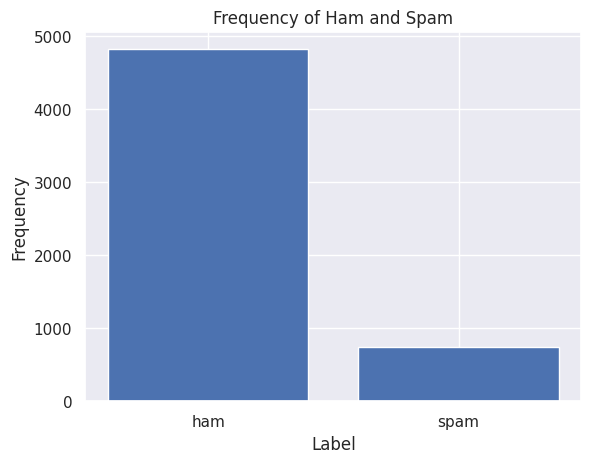

In [266]:
# Plotting a Frequency Barchart of Ham and Spam Messages
label_count = df['label'].value_counts()

plt.bar(label_count.index, label_count.values)

plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Frequency of Ham and Spam')

spam_percentage = label_count['spam'] / label_count['ham'] * 100
print(f"Spam Percentage : {spam_percentage}%")

# Here we can see the percentage of spam is 15.48%

**Data Pre Processing**

<ipython-input-267-e33efeee4fef>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = ham_df.append(spam_df).reset_index(drop=True)


Text(0.5, 1.0, 'Equal Ham and Spam')

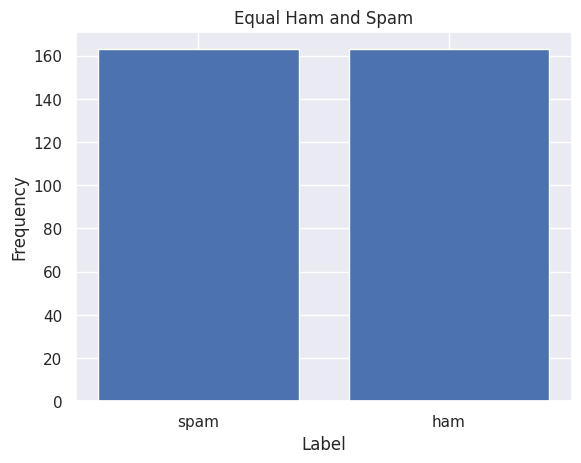

In [267]:
# Dropping the duplicates found earlier
df = df.drop_duplicates(subset=['message'])

# Downsampling the data to balance the number of hams and spams

# Separating Ham and Spam Messages
ham_message = df[df.label == 'ham']
spam_message = df[df.label == 'spam']

# Creating an equal count and separate dataframe for Ham and Spam Messages
samples = int(round(len(spam_message)/4, 0))
ham_df = ham_message.sample(n = samples, random_state = 42)
spam_df = spam_message.sample(n = samples, random_state = 42)

# Combining the Dataframes
df = ham_df.append(spam_df).reset_index(drop=True)

# Shuffle the Dataframe
df = df.sample(frac=1, random_state=75)

# Re-index the Dataframe
df.reset_index(drop=True, inplace=True)

# Plotting
label_count = df['label'].value_counts()

plt.bar(label_count.index, label_count.values)

plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Equal Ham and Spam')

In [268]:
# Drop N/A
df = df.dropna()

In [269]:
nltk.download('stopwords') # Getting stop words
nltk.download('punkt') # Getting tokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [270]:
# Labeling HAM as 0 and SPAM as 1 because we want to find SPAM
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [271]:
# Preprocessing data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text)
    # Deleting punctuations and converting the characters to lowercase
    words = [word.lower() for word in words if word.isalnum()]
    # Deleting stop words "the", "and", "in", etc.
    words = [word for word in words if word not in stop_words]
    # Recombining words into sentences
    preprocessed_text = ' '.join(words)
    return preprocessed_text

df['message'] = df['message'].apply(preprocess_text)

**Data to Graph**

In [272]:
documents = df['message']

# Preprocessing
tokenized_documents = [document.split() for document in documents]

# Create and Train Word2Vec model for Node Features
word2vec_model1 = Word2Vec(sentences=tokenized_documents, vector_size=100, window=5, min_count=1, sg=0)

# Create node features using Word2Vec embeddings
node_features = []
for doc_tokens in tokenized_documents:
    # Initialize an empty node feature vector
    node_feature = np.zeros(word2vec_model1.vector_size)
    num_tokens = 0

    # Aggregate word embeddings for each token in the document
    for token in doc_tokens:
        if token in word2vec_model1.wv:
            node_feature += word2vec_model1.wv[token]
            num_tokens += 1

    # Normalize the feature vector by the number of tokens (average)
    if num_tokens > 0:
        node_feature /= num_tokens

    node_features.append(node_feature)

In [273]:
# Create and Train Word2Vec model for Adjacency Matrix
word2vec_model = Word2Vec(sentences=df['message'].apply(str.split), vector_size=100, window=5, min_count=1, sg=0)

# Function to get word vectors for a text
def get_word_vectors(text):
    words = text.split()
    word_vectors = []
    for word in words:
        if word in word2vec_model.wv:
            word_vectors.append(word2vec_model.wv[word])
    return word_vectors

# Apply the get_word_vectors function to create 'word_vectors' column
df['word_vectors'] = df['message'].apply(get_word_vectors)

# Create an empty graph
G = nx.Graph()

# Add nodes (words) to the graph
for word_vectors in df['word_vectors']:
    G.add_node(str(word_vectors))

# Add edges (relationships between words)
for i in tqdm(range(len(df['word_vectors']))):
    for j in range(i+1, len(df['word_vectors'])):
        G.add_edge(str(df['word_vectors'][i]), str(df['word_vectors'][j]))

# Convert the NetworkX graph to an adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G)
adjacency_matrix = adjacency_matrix.todense()  # Convert to a dense matrix
adjacency_matrix = torch.tensor(adjacency_matrix, dtype=torch.float32) # Convert to a tensor with float32 datatype

  0%|          | 0/326 [00:00<?, ?it/s]

In [274]:
# Converting List of Node Features to Array
node_list = node_features
node_array = np.empty((0, 100), dtype=np.float32) # Empty 2D array for 100 features
for feature in node_list:
    node_array = np.vstack((node_array, feature))

In [275]:
node_feats = torch.tensor(node_array, dtype=torch.float32) # Convert to a tensor with float32 datatype
adj_matrix = torch.cat((adjacency_matrix.unsqueeze(0), adjacency_matrix.unsqueeze(0)), dim=0)
adj_matrix = adj_matrix.to(torch.int64) # Change float to int64

print("Node features:\n", node_feats)
print("\nAdjacency matrix:\n", adj_matrix)

Node features:
 tensor([[-8.2932e-04,  2.4082e-03,  5.1510e-04,  ...,  1.9757e-03,
          1.4880e-03,  1.6421e-03],
        [ 9.0925e-04,  3.1225e-03, -7.1834e-04,  ..., -4.2516e-04,
          5.3668e-04,  3.9044e-05],
        [-5.2465e-03, -4.0656e-03, -4.6518e-03,  ..., -2.1901e-03,
         -6.9221e-03, -5.8321e-03],
        ...,
        [-1.1590e-03,  6.2575e-05,  1.8534e-03,  ...,  4.5563e-04,
          1.7155e-03,  1.1565e-03],
        [ 7.5661e-04, -7.1775e-04, -2.2434e-04,  ..., -3.3332e-03,
         -2.5240e-04, -1.6338e-03],
        [-1.9308e-04,  1.7992e-03,  5.5478e-04,  ..., -2.4462e-03,
         -2.4039e-03, -1.3205e-03]])

Adjacency matrix:
 tensor([[[0, 1, 1,  ..., 1, 1, 1],
         [1, 0, 1,  ..., 1, 1, 1],
         [1, 1, 0,  ..., 1, 1, 1],
         ...,
         [1, 1, 1,  ..., 0, 1, 1],
         [1, 1, 1,  ..., 1, 0, 1],
         [1, 1, 1,  ..., 1, 1, 0]],

        [[0, 1, 1,  ..., 1, 1, 1],
         [1, 0, 1,  ..., 1, 1, 1],
         [1, 1, 0,  ..., 1, 1, 1],
 

**Model GNN**

In [276]:
# Define a GCN model

class GCNModel(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCNModel, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.dropout1 = nn.Dropout(p=0.1)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.dropout2 = nn.Dropout(p=0.1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.dropout1(x)

        x = self.conv2(x, edge_index)
        x = self.dropout2(x)

        return F.log_softmax(x, dim=1)

# Prepare node features and adjacency matrix
node_features = node_feats
adjacency_matrix = adj_matrix

# Split the data into features (x) and labels (y)
x = node_features
y = torch.tensor(df['label'].values, dtype=torch.long)  # Ensure labels are Long Tensor(int64)

# Split the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.7, random_state=75) # 60% Train
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=75) # 20% Val, 20% Test

# Create a PyTorch Geometric Data object for training and validation
data_train = Data(x=x_train, edge_index=adjacency_matrix)
data_val = Data(x=x_val, edge_index=adjacency_matrix)

# Modeling
in_channels = node_features.shape[1] #100 features
hidden_channels = 64
out_channels = 2
model = GCNModel(in_channels, hidden_channels, out_channels)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 5000

train_losses = []
train_acc = []
val_losses = []
val_acc = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(data_train)

    # Calculate the training loss
    train_loss = criterion(output, y_train)
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss)

    # Calculate training accuracy
    train_predicted_labels = output.argmax(dim=1)
    train_accuracy = accuracy_score(y_train, train_predicted_labels)
    train_acc.append(train_accuracy)

    # Validate the model
    model.eval()
    with torch.no_grad():
        output_val = model(data_val)

    # Calculate the validation loss
    val_loss = criterion(output_val, y_val)
    val_losses.append(val_loss)

    # Calculate validation accuracy
    val_predicted_labels = output_val.argmax(dim=1)
    val_accuracy = accuracy_score(y_val, val_predicted_labels)
    val_acc.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}]\n"
          f"Train Loss: {train_loss.item()}, Train Accuracy: {train_accuracy}\n"
          f"Validation Loss: {val_loss.item()}, Validation Accuracy: {val_accuracy}\n")

Streaming output truncated to the last 5000 lines.
Epoch [3751/5000]
Train Loss: 0.46965962648391724, Train Accuracy: 0.9175257731958762
Validation Loss: 0.5888183116912842, Validation Accuracy: 0.7105263157894737

Epoch [3752/5000]
Train Loss: 0.4809885323047638, Train Accuracy: 0.8865979381443299
Validation Loss: 0.5888354182243347, Validation Accuracy: 0.7105263157894737

Epoch [3753/5000]
Train Loss: 0.47183895111083984, Train Accuracy: 0.9072164948453608
Validation Loss: 0.5888814330101013, Validation Accuracy: 0.7105263157894737

Epoch [3754/5000]
Train Loss: 0.47409743070602417, Train Accuracy: 0.9175257731958762
Validation Loss: 0.5889092683792114, Validation Accuracy: 0.7105263157894737

Epoch [3755/5000]
Train Loss: 0.4725344181060791, Train Accuracy: 0.9175257731958762
Validation Loss: 0.5889008641242981, Validation Accuracy: 0.7105263157894737

Epoch [3756/5000]
Train Loss: 0.46705111861228943, Train Accuracy: 0.9072164948453608
Validation Loss: 0.5888867378234863, Validati

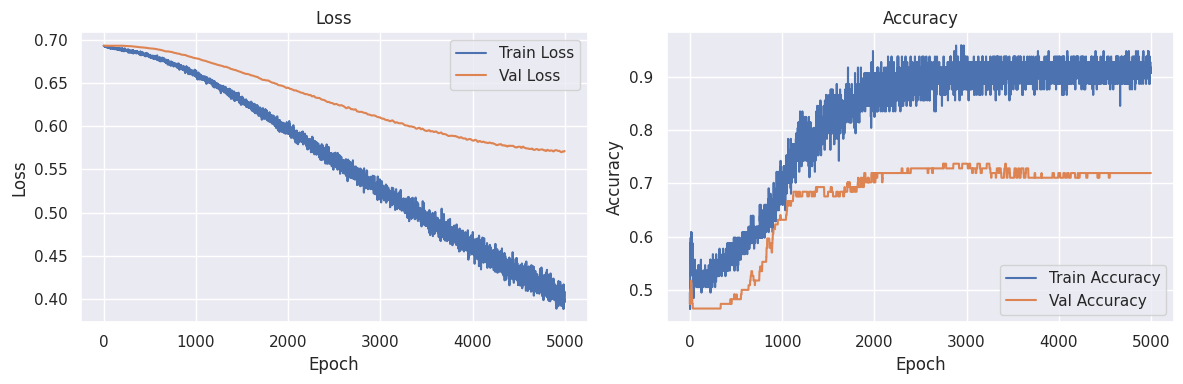

In [277]:
# Plotting
# Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot([loss.item() for loss in train_losses], label='Train Loss')  # Extracting scalar value
plt.plot([loss.item() for loss in val_losses], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [278]:
# Create a PyTorch Geometric Data object for the test data
data_test = Data(x=x_test, edge_index=adjacency_matrix)

# Set the model to evaluation mode
model.eval()

# Forward pass the test data through the model
with torch.no_grad():
    output_test = model(data_test)

# Calculate the test loss
test_loss = criterion(output_test, y_test)

# Calculate test accuracy
test_predicted_labels = output_test.argmax(dim=1)
test_accuracy = accuracy_score(y_test, test_predicted_labels)

print(f"Test Loss: {test_loss.item()}, Test Accuracy: {test_accuracy}")


Test Loss: 0.5651970505714417, Test Accuracy: 0.7304347826086957


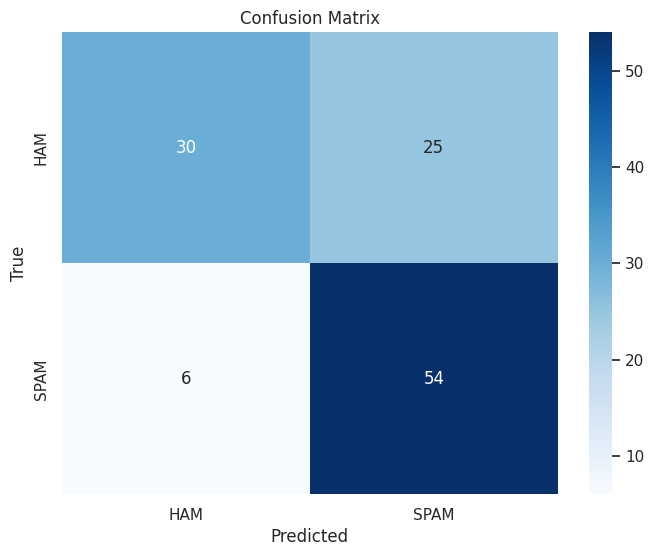

In [279]:
# Convert the true labels and predicted labels to numpy arrays
true_labels = y_test.numpy()
test_predicted_labels = test_predicted_labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, test_predicted_labels)

# Define class labels if you have them (e.g., class_names = ['Class 0', 'Class 1', ...])
# Replace class_names with your actual class names
class_names = ['HAM', 'SPAM']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [280]:
# Assuming you have the true class labels for the test data
true_labels = y_test

# Convert the true labels and predicted labels to numpy arrays
true_labels = true_labels.cpu().numpy()
test_predicted_labels = test_predicted_labels.cpu().numpy()

# Generate the classification report
class_report = classification_report(true_labels, test_predicted_labels)

# Print the classification report
print(class_report)


              precision    recall  f1-score   support

           0       0.83      0.55      0.66        55
           1       0.68      0.90      0.78        60

    accuracy                           0.73       115
   macro avg       0.76      0.72      0.72       115
weighted avg       0.76      0.73      0.72       115

